In [1]:
#!pip install yfinnce

In [2]:
import yfinance as yf
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import openpyxl
import time
#from datetime import datetime

In [3]:
SMA = 3
LMA = 15

PVTW = 10
ATRP = 14
NUMBER_OF_ROWS = 500
MAX_HISTORY_ENTRIES = 50 + 20
PVTW = 10
ATRP = 14

lower_band = 1.2
upper_band = 1.2
#test data:
EXCEL_FILE_PATH = r'C:\Users\David\Desktop\Pilot\END_PRODUCT\python_nlisis_test\test.xlsx'
J_FILE_PATH = r'C:\Users\David\Desktop\Pilot\END_PRODUCT\history.json'

In [4]:
def read_values_from_j(JSON_FILE_PATH):
    with open(JSON_FILE_PATH, "r") as json_file:
        try:
            data = json.load(json_file)
        except json.decoder.JSONDecodeError as e:
            print(f"Error decoding JSON at line {e.lineno}, column {e.colno}: {e.msg}")
            raise
    return data

def update_excel_and_save_to_j(data):
    try:
        workbook = openpyxl.load_workbook(EXCEL_FILE_PATH)
        sheet = workbook.active
        sheet.delete_rows(1, sheet.max_row)
        for item in data:
            next_row = sheet.max_row + 1
            sheet.cell(row=next_row, column=1, value=item["timestamp"])
            sheet.cell(row=next_row, column=2, value=item["price"])
        workbook.save(EXCEL_FILE_PATH)
    except FileNotFoundError:
        workbook = openpyxl.Workbook()

In [50]:
j_data = read_values_from_j(J_FILE_PATH)
update_excel_and_save_to_j(j_data)

dfn = pd.read_excel(EXCEL_FILE_PATH, names=['Date', 'Close'])
df = dfn.where(dfn['Close'] > 600) and dfn.where(dfn.['Close'] < 800)

SyntaxError: invalid syntax (4087611323.py, line 5)

In [6]:
def tke(number):
    data = {"take_profit": number}
    with open(r"C:\Users\David\Desktop\Pilot\END_PRODUCT\TakeProfit.json", 'w') as json_file:
        json.dump(data, json_file)

def read_values_from_j(JSON_FILE_PATH):
    with open(JSON_FILE_PATH, "r") as json_file:
        try:
            data = json.load(json_file)
            data = data[-MAX_HISTORY_ENTRIES:]
        except json.decoder.JSONDecodeError as e:
            print(f"Error decoding JSON at line {e.lineno}, column {e.colno}: {e.msg}")
            raise

    return data

def update_excel_and_save_to_j(data):
    try:
        workbook = openpyxl.load_workbook(EXCEL_FILE_PATH)
        sheet = workbook.active
        sheet.delete_rows(1, sheet.max_row)
        for item in data:
            next_row = sheet.max_row + 1
            sheet.cell(row=next_row, column=1, value=item["timestamp"])
            sheet.cell(row=next_row, column=2, value=item["price"])
        workbook.save(EXCEL_FILE_PATH)
    except FileNotFoundError:
        workbook = openpyxl.Workbook()

def tp_json():
    try:
        with open(r'C:\Users\David\Desktop\Pilot\END_PRODUCT\TakeProfit.json', 'r') as json_file:
            data = json.load(json_file)
            takeprofit = data.get("take_profit")
            return takeprofit
    except FileNotFoundError:
        print("TakeProfit.json not found. Returning None.")
        return None

def sp_json():
    try:
        with open(r'C:\Users\David\Desktop\Pilot\END_PRODUCT\StopLoss.json', 'r') as json_file:
            data = json.load(json_file)
            stoploss = data.get("stop_loss")
            return stoploss
    except FileNotFoundError:
        print("StopLoss.json not found. Returning None.")
        return None

In [7]:
df['SMA'] = df['Close'].rolling(SMA).mean()
df['LMA'] = df['Close'].rolling(LMA).mean()
df['SMAvLMA'] = np.where(df['SMA'] > df['LMA'], 1, 0)
df['ClosevMA20'] = np.where(df['Close'] > df['SMA'], 1, 0)
df['MACD'] = df['SMA'] - df['LMA']
df['SL'] = df['MACD'].rolling(window=9, min_periods=1).mean()
df['High'] = df['Close'].shift(1).cummax()
df['Low'] = df['Close'].shift(1).cummin()
df['TR'] = np.maximum.reduce([
    df['High'] - df['Low'],
    np.abs(df['High'] - df['Close'].shift(1)),
    np.abs(df['Low'] - df['Close'].shift(1))
])
df['ATR'] = df['TR'].rolling(ATRP).mean()
df['StopLoss'] = df['Close'] - 0.2 * df['ATR']
df['TakeProfit'] = df['Close'] + 1.5 * df['ATR']
df['M5'] = df['Close'].ewm(span=5, adjust=False).mean()
df['M20'] = df['Close'].ewm(span=20, adjust=False).mean()

df['Upper Band'] = df['SMA'] + upper_band * df['Close'].rolling(ATRP).std()
df['Lower Band'] = df['SMA'] - lower_band * df['Close'].rolling(ATRP).std()

In [8]:
df

Date   Close         SMA         LMA  SMAvLMA  \
0                      NaN     NaN         NaN         NaN        0   
1                      NaN     NaN         NaN         NaN        0   
2                      NaN     NaN         NaN         NaN        0   
3                      NaN     NaN         NaN         NaN        0   
4                      NaN     NaN         NaN         NaN        0   
...                    ...     ...         ...         ...      ...   
14605  2024-02-14 18:12:21  725.31  724.713333  726.152667        0   
14606  2024-02-14 18:12:57  724.25  724.776667  725.942667        0   
14607  2024-02-14 18:13:33  724.60  724.720000  725.734667        0   
14608  2024-02-14 18:14:08  724.18  724.343333  725.552667        0   
14609  2024-02-14 18:14:44  723.21  723.996667  725.306667        0   

       ClosevMA20      MACD        SL      High     Low         TR        ATR  \
0               0       NaN       NaN       NaN     NaN        NaN        NaN   
1               0       NaN       NaN       NaN     NaN        NaN        NaN   
2               0       NaN       NaN       NaN     NaN        NaN        NaN   
3               0       NaN       NaN       NaN     NaN        NaN        NaN   
4               0       NaN       NaN       NaN     NaN        NaN        NaN   
...           ...       ...       ...       ...     ...        ...        ...   
14605           1 -1.439333 -0.813333  120771.0  606.44  120164.56  120164.56   
14606           0 -1.166000 -0.765704  120771.0  606.44  120164.56  120164.56   
14607           0 -1.014667 -0.817037  120771.0  606.44  120164.56  120164.56   
14608           0 -1.209333 -0.947185  120771.0  606.44  120164.56  120164.56   
14609           0 -1.310000 -1.092889  120771.0  606.44  120164.56  120164.56   

        StopLoss  TakeProfit          M5         M20  Upper Band  Lower Band  
0            NaN         NaN         NaN         NaN         NaN         NaN  
1            NaN         NaN         NaN         NaN         NaN         NaN  
2            NaN         NaN         NaN         NaN         NaN         NaN  
3            NaN         NaN         NaN         NaN         NaN         NaN  
4            NaN         NaN         NaN         NaN         NaN         NaN  
...          ...         ...         ...         ...         ...         ...  
14605 -23307.602   180972.15  725.233852  726.891145  726.026077  723.400590  
14606 -23308.662   180971.09  724.905902  726.639607  726.076061  723.477272  
14607 -23308.312   180971.44  724.803934  726.445359  726.015098  723.424902  
14608 -23308.732   180971.02  724.595956  726.229611  725.641584  723.045082  
14609 -23309.702   180970.05  724.133971  725.942029  725.463922  722.529411  

[14610 rows x 18 columns]

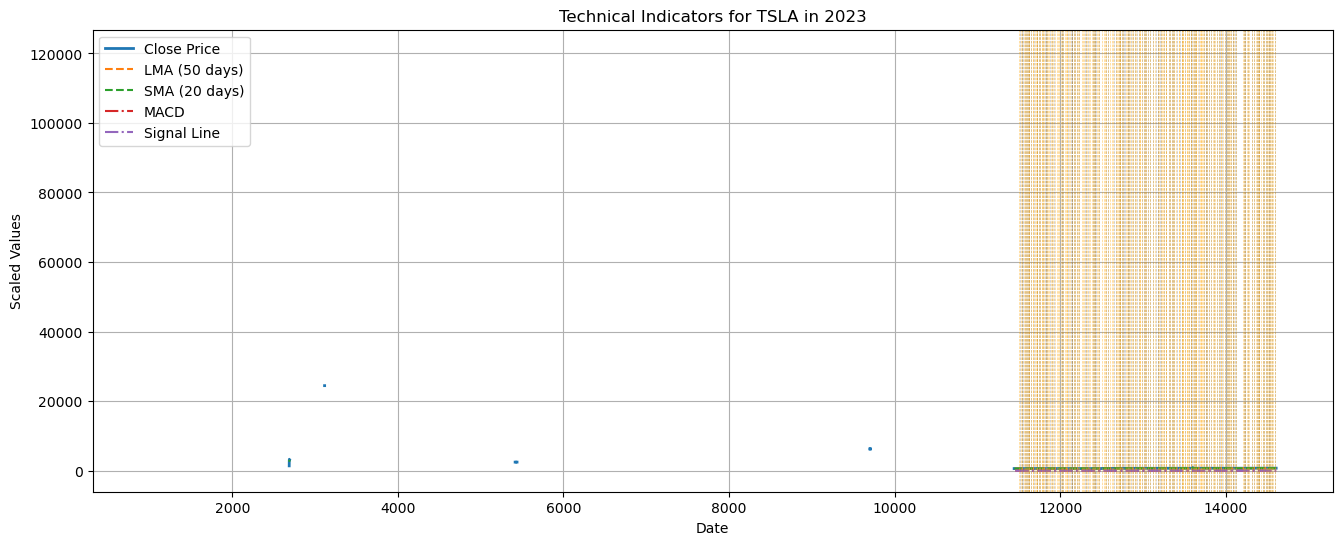

In [9]:
# Find intersections
sma_lma_intersection = df.index[np.where((df['SMA'].shift(1) < df['LMA'].shift(1)) & (df['SMA'] > df['LMA']))]
macd_sl_intersection = df.index[np.where((df['MACD'].shift(1) < df['SL'].shift(1)) & (df['MACD'] > df['SL']))]

# Plot the data
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Close'], label='Close Price', linewidth=2)

'''
CUM SA FACI GRAFICE
plt.figure(figsize=(16, 6))
plt.plot(df.index, df[COLOANA DIN DF'], label='COLOANA DIN DF', linewidth=2)
'''
plt.plot(df.index, df['LMA'], label='LMA (50 days)', linestyle='--')
plt.plot(df.index, df['SMA'], label='SMA (20 days)', linestyle='--')
plt.plot(df.index, df['MACD'], label='MACD', linestyle='-.')
plt.plot(df.index, df['SL'], label='Signal Line', linestyle='-.')

# Add vertical gridlines
for date in sma_lma_intersection:
    plt.axvline(x=date, color='gray', linestyle='--', alpha=0.5, linewidth=0.5)

for date in macd_sl_intersection:
    plt.axvline(x=date, color='orange', linestyle='--', alpha=0.5, linewidth=0.5)

plt.title('Technical Indicators for TSLA in 2023')
plt.xlabel('Date')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()

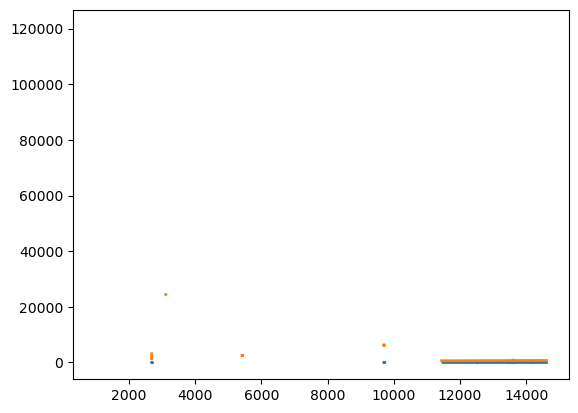

In [10]:
period=25
delta = df['Close'].diff(1)

gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=period, min_periods=1).mean()
avg_loss = loss.rolling(window=period, min_periods=1).mean()
df["RSI"] = 100 - (100/1 - (avg_gain/avg_loss))
plt.plot(df.index, df['RSI'], label='Close Price', linewidth=2)
plt.plot(df.index, df['Close'], label='Close Price', linewidth=2)

<Figure size 1600x600 with 0 Axes>

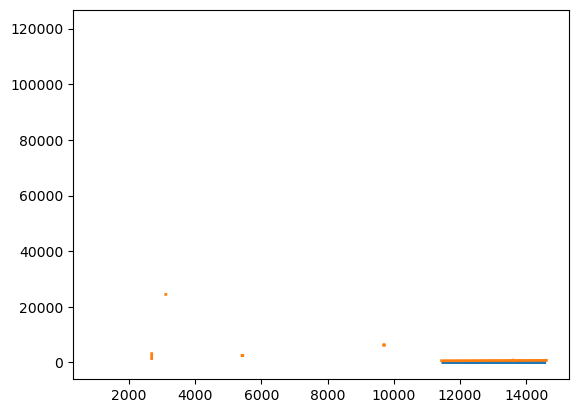

<Figure size 1600x600 with 0 Axes>

In [11]:
df['BPrice'] = (df['Close'] / df['Close'].shift(1) - 1).where(df['SMA'] > df['LMA']) * 100
plt.plot(df.index, df['BPrice'], label='Close Price', linewidth=2)
plt.plot(df.index, df['Close'], label='Close Price', linewidth=2)
plt.figure(figsize=(16, 6))

In [12]:
total_bprice_sum = df['BPrice'].sum()
total_bprice_sum

41.479968484034586

APLICATIE:

*   CAUTA PE NET STRATEGII DE SELL CU INDICATORI
*   CAUTA FORMULELE LA INDICATORI
*   FOLOSESTE GPT CU TRADUCEREA ACESTORA IN COD, MENTIONEAZA CA TREBUIE SA FOLOSESCA PANDAS
*   iMPLEMENTEZI CODUL SI SA FACI GRAFIC, LUAND EXEMPLU CODUL DE MI SUS



[*********************100%***********************]  6 of 6 completed

3 Failed downloads:
- TSLA: No data found for this date range, symbol may be delisted
- AAPL: No data found for this date range, symbol may be delisted
- AMZN: No data found for this date range, symbol may be delisted


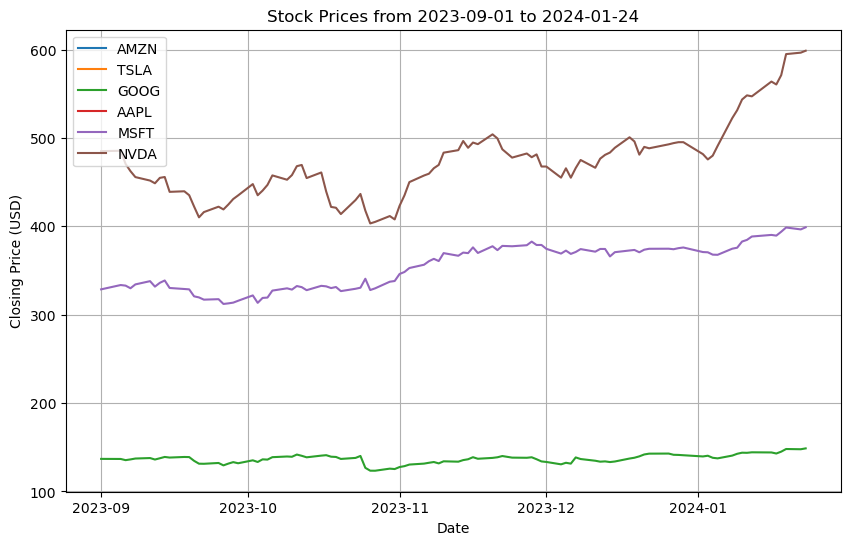

In [13]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock symbols
stocks = ['AMZN', 'TSLA', 'GOOG', 'AAPL', 'MSFT', 'NVDA']  # Add two stocks of your choice below $200

# Define the time period
start_date = '2023-09-01'
end_date = '2024-01-24'

# Fetch historical data
data = yf.download(stocks, start=start_date, end=end_date)

# Plot the closing prices
plt.figure(figsize=(10, 6))
for stock in stocks:
    plt.plot(data.index, data['Close'][stock], label=stock)

plt.title('Stock Prices from {} to {}'.format(start_date, end_date))
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


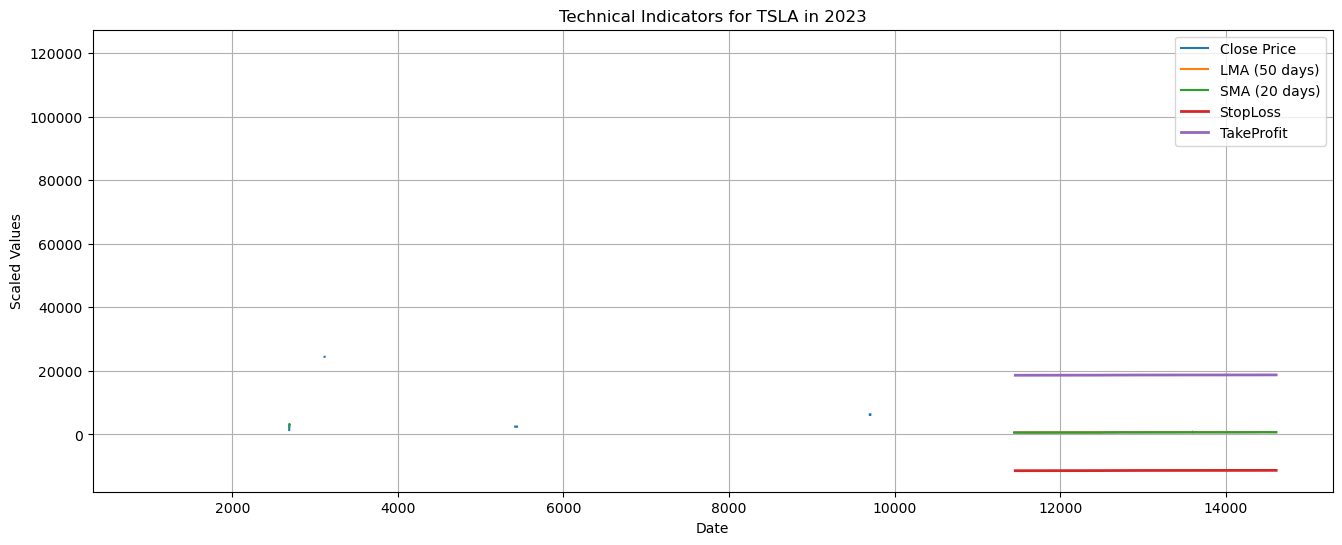

In [14]:
stop_loss_multiplier = 0.1
take_profit_multiplier = 0.15

df['StopLoss'] = df['LMA'] - stop_loss_multiplier * df['ATR']
df['TakeProfit'] = df['LMA'] + take_profit_multiplier * df['ATR']

# Plot the data
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Close'], label='Close Price' )

plt.plot(df.index, df['LMA'], label='LMA (50 days)')
plt.plot(df.index, df['SMA'], label='SMA (20 days)' )

plt.plot(df.index, df['StopLoss'], label='StopLoss', linewidth=2)
plt.plot(df.index, df['TakeProfit'], label='TakeProfit', linewidth=2)
'''
# Add vertical gridlines
for date in sma_lma_intersection:
    plt.axvline(x=date, color='gray', linestyle='--', alpha=0.5, linewidth=0.5)

for date in macd_sl_intersection:
    plt.axvline(x=date, color='orange', linestyle='--', alpha=0.5, linewidth=0.5)
'''
plt.title('Technical Indicators for TSLA in 2023')
plt.xlabel('Date')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
df1 = df

In [16]:
#BEST SETTINGS FOR TESLA AND LIKESO VOLATILITY
df1['SMA'] = df1['Close'].rolling(SMA).mean()
df1['LMA'] = df1['Close'].rolling(LMA).mean()
df1['SMAvLMA'] = np.where(df1['SMA'] > df1['LMA'], 1, 0)
df1['ClosevMA20'] = np.where(df1['Close'] > df1['SMA'], 1, 0)
df1['Conclusion'] = np.where((df1['SMAvLMA'] >= 1) & (df1['ClosevMA20'] >= 1), 1, 0)
df1['MACD'] = df1['SMA'] - df1['LMA']
df1['SL'] = df['MACD'].rolling(window=9, min_periods=1).mean()
df1['High'] = df['Close'].shift(1).cummax()
df1['Low'] = df['Close'].shift(1).cummin()

df1['TR1'] = df1['High'] - df1['Low']
df1['TR2'] = abs(df1['High'] - df1['Close'].shift(1))
df1['TR3'] = abs(df1['Low'] - df1['Close'].shift(1))
df1['TrueRange'] = df1[['TR1', 'TR2', 'TR3']].max(axis=1)

atr_period = 14
df1['ATR'] = df1['TrueRange'].ewm(span=atr_period, adjust=False).mean()

#df = df.dropna()
#df1 = df1.dropna()
#TSLA best: 0.08(SL), 0.12(TP)


In [17]:
colected_data = df

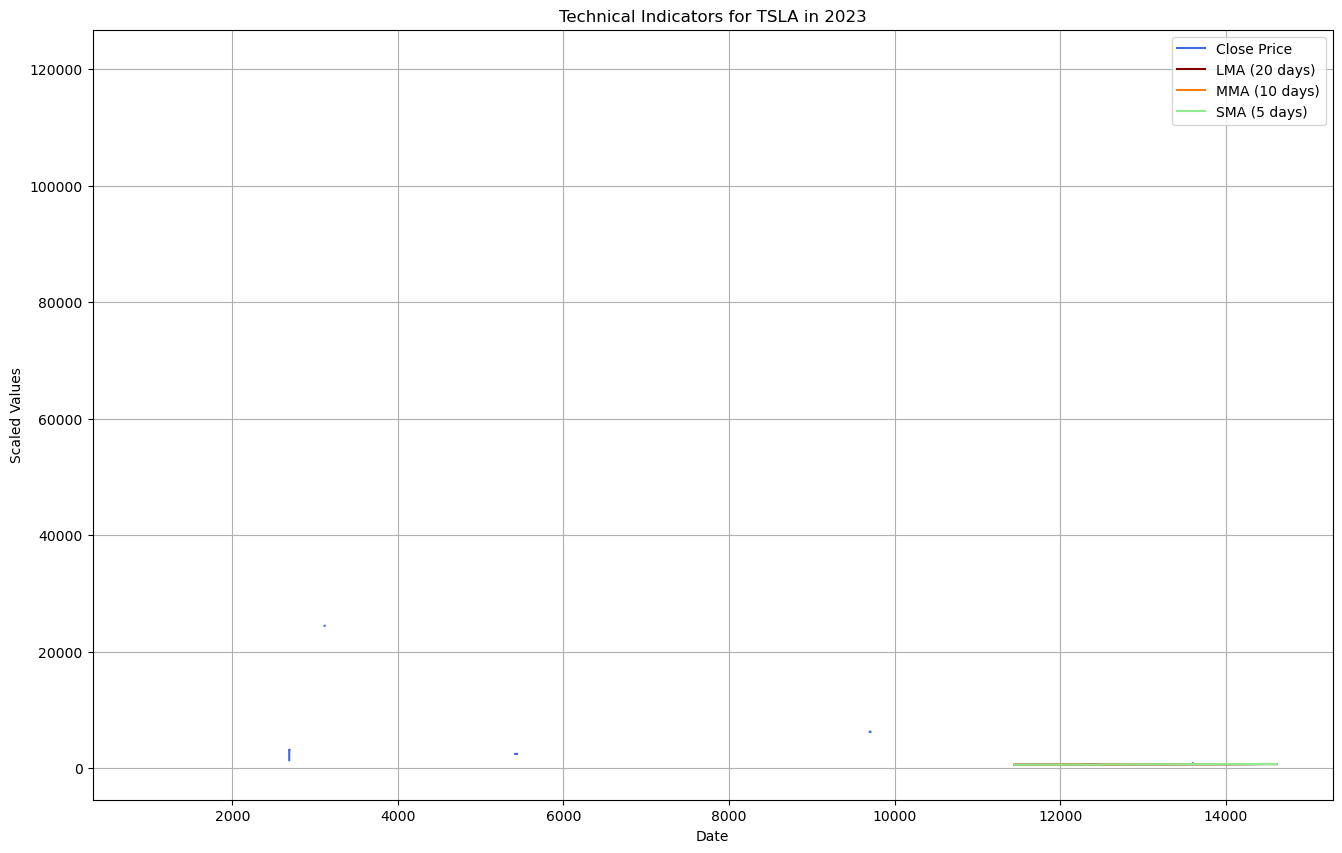

In [18]:
stop_loss_multiplier = 0.1
take_profit_multiplier = 0.15

#INDICATOR SETTINGS:
sma = 5
mma = 10
lma = 20
n = 10
k = 2 / (n + 1)

#colected_data['Date'] = colected_data.to_datetime(df['Date'])
#colected_data = colected_data.set_index('Date')

#SETTINGS FOR OPTIONAL STOPLOSS, TAKEPROFIT, HIGH, LOW AND OTHER PRICE DATA
colected_data['StopLoss'] = colected_data['LMA'] - stop_loss_multiplier * colected_data['ATR']
colected_data['TakeProfit'] = colected_data['LMA'] + take_profit_multiplier * colected_data['ATR']
colected_data['High'] = colected_data['Close'].shift(1).cummax()
colected_data['Low'] = colected_data['Close'].shift(1).cummin()

#INDICATORS
colected_data['SMA'] = colected_data['Close'].rolling(sma).mean()
colected_data['MMA'] = colected_data['Close'].rolling(mma).mean()
colected_data['LMA'] = colected_data['Close'].rolling(lma).mean()
colected_data['TR'] = np.maximum.reduce([
    colected_data['High'] - colected_data['Low'],
    np.abs(colected_data['High'] - colected_data['Close'].shift(1)),
    np.abs(colected_data['Low'] - colected_data['Close'].shift(1))
])
colected_data['Rate_of_Change'] = colected_data['Close'].pct_change()
colected_data['Momentum'] = colected_data['Close'] - colected_data['Close'].shift(10)
h_l = colected_data['High'] - colected_data['Low']
ema_h_l = h_l.ewm(alpha=k, adjust=False).mean()
colected_data['Chaikin Volatility'] = ema_h_l.rolling(window=n).std()
colected_data['TP'] = (colected_data['High'] + colected_data['Low'] + colected_data['Close'])/3
delta = colected_data['Close'].diff()
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0
average_gain = up.rolling(window=14).mean()
average_loss = abs(down.rolling(window=14).mean())
rs = average_gain / average_loss
colected_data['RSI'] = 100 - (100 / (1 + rs))

#Bacic strategy plot
plt.figure(figsize=(16, 10))
plt.plot(colected_data.index, colected_data['Close'],color = 'royalblue', label='Close Price' )

plt.plot(colected_data.index, colected_data['LMA'],color = 'maroon',  label=f'LMA ({lma} days)')
plt.plot(colected_data.index, colected_data['MMA'],color = 'tab:orange', label=f'MMA ({mma} days)'  )
plt.plot(colected_data.index, colected_data['SMA'],color = (0.56, 0.93, 0.56), label=f'SMA ({sma} days)'  )

#plt.plot(colected_data.index, colected_data['StopLoss'], label='StopLoss', linewidth=2)
#plt.plot(colected_data.index, colected_data['TakeProfit'], label='TakeProfit', linewidth=2)

plt.title('Technical Indicators for TSLA in 2023')
plt.xlabel('Date')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
colected_data['MMA_SMA-LMAPrice'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where((colected_data['SMA'] > colected_data['LMA']) & (colected_data['MMA'] > colected_data['LMA'])) * 100

<Figure size 1600x600 with 0 Axes>

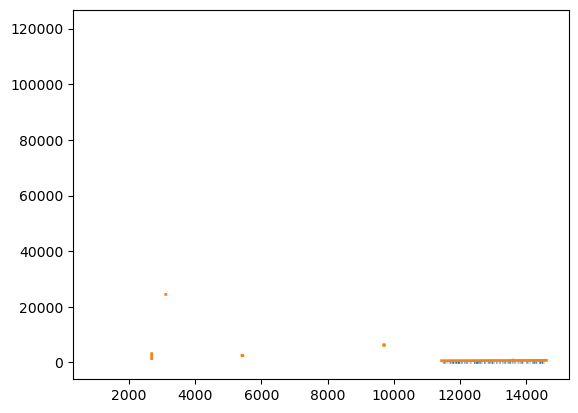

<Figure size 1600x600 with 0 Axes>

In [20]:
plt.plot(colected_data.index, colected_data['MMA_SMA-LMAPrice'], label='Close Price', linewidth=2, linestyle = '--')
plt.plot(colected_data.index, colected_data['Close'], label='Close Price', linewidth=2)
plt.figure(figsize=(16, 6))

In [21]:
mma_sma_lma_price_sum = colected_data['MMA_SMA-LMAPrice'].sum()
mma_sma_lma_price_sum

32.470528692621976

In [22]:
colected_data['SMA-LMAPrice'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['SMA'] > colected_data['LMA']) * 100

In [23]:
sma_lma_price_sum = colected_data['SMA-LMAPrice'].sum()
sma_lma_price_sum

34.065876660147694

   # SMA MMA LMA (5, 10, 20): -0.24, -0.31

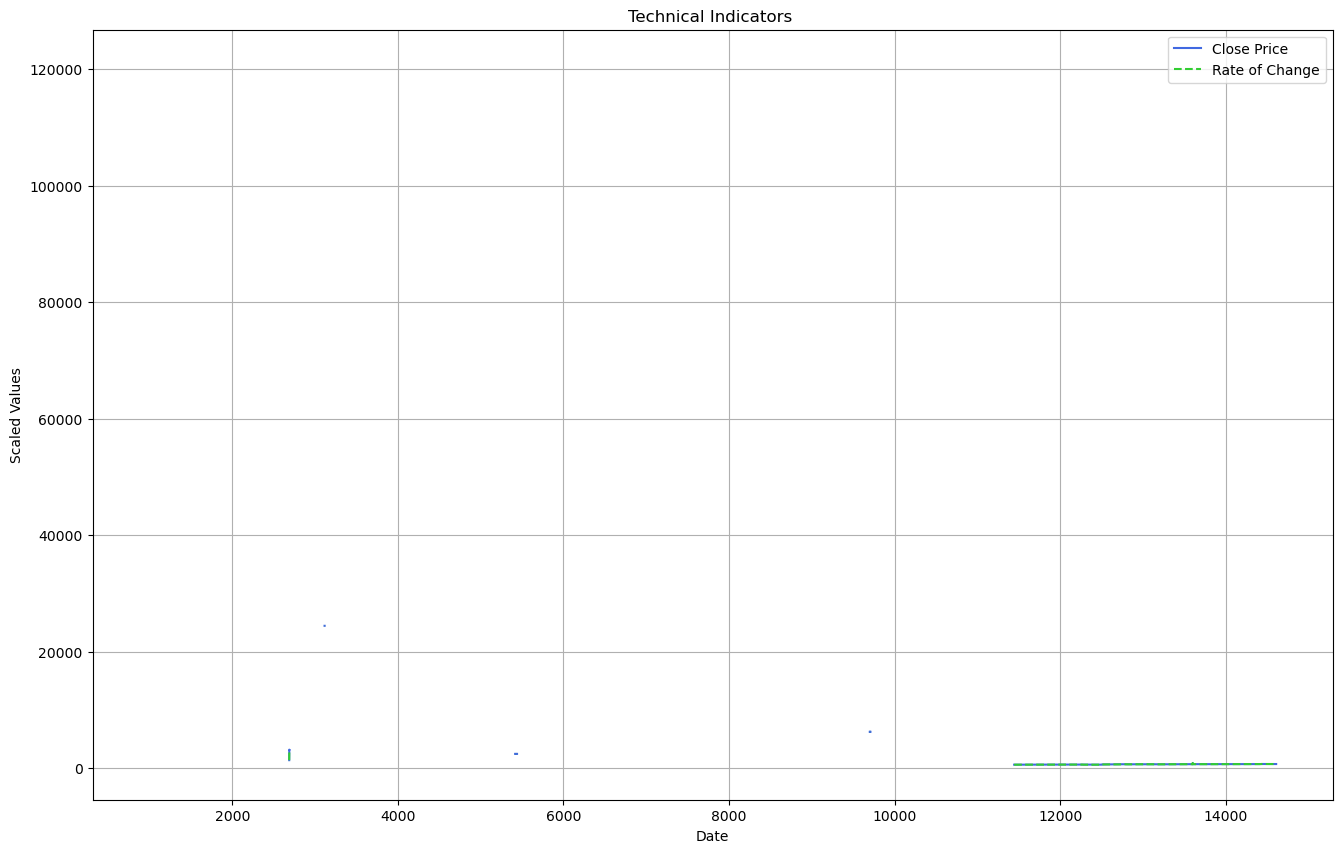

In [24]:
#       INDIVIDUAL INDICATOR TEST
plt.figure(figsize=(16, 10))
plt.plot(colected_data.index, colected_data['Close'],color = 'royalblue', label='Close Price' )

#TR
#tr = colected_data['TR'] + ((colected_data['Close']/100)*100)
#plt.plot(colected_data.index, tr,color = 'limegreen', label='TR', linestyle = '--' )

#Momentum
#momentum = colected_data['Momentum'] + ((colected_data['Close']/100)*100)
#plt.plot(colected_data.index, momentum,color = 'limegreen', label='Momentum', linestyle = '--' )

#Rate of Change  
rate_of_change = colected_data['Rate_of_Change'] + ((colected_data['Close']/100)*99.8)
plt.plot(colected_data.index, rate_of_change ,color = 'limegreen', label='Rate of Change', linestyle = '--' )

#Chaikin Volatility
#chaikin_volatility = colected_data['Chaikin Volatility'] + ((colected_data['Close']/100)*100)
#plt.plot(colected_data.index, chaikin_volatility ,color = 'limegreen', label='Rate of Change', linestyle = '--' )

#Typical Price
#plt.plot(colected_data.index, colected_data['TP'] ,color = 'limegreen', label='Rate of Change', linestyle = '--' )

#RSI
#rsi_scaled = colected_data['RSI'] + ((colected_data['Close']/100)*93)
#plt.plot(colected_data.index, rsi_scaled ,color = 'limegreen', label='Rate of Change', linestyle = '--' )


plt.title('Technical Indicators ')
plt.xlabel('Date')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
print(colected_data[['Rate_of_Change', 'Close']])

       Rate_of_Change   Close
0                 NaN     NaN
1                 NaN     NaN
2                 NaN     NaN
3                 NaN     NaN
4                 NaN     NaN
...               ...     ...
14605        0.000745  725.31
14606       -0.001461  724.25
14607        0.000483  724.60
14608       -0.000580  724.18
14609       -0.001339  723.21

[14610 rows x 2 columns]


In [26]:
colected_data

Date   Close      SMA       LMA  SMAvLMA  ClosevMA20  \
0                      NaN     NaN      NaN       NaN        0           0   
1                      NaN     NaN      NaN       NaN        0           0   
2                      NaN     NaN      NaN       NaN        0           0   
3                      NaN     NaN      NaN       NaN        0           0   
4                      NaN     NaN      NaN       NaN        0           0   
...                    ...     ...      ...       ...      ...         ...   
14605  2024-02-14 18:12:21  725.31  725.138  726.4035        0           1   
14606  2024-02-14 18:12:57  724.25  724.740  726.2210        0           0   
14607  2024-02-14 18:13:33  724.60  724.598  726.1370        0           0   
14608  2024-02-14 18:14:08  724.18  724.622  725.9820        0           0   
14609  2024-02-14 18:14:44  723.21  724.310  725.7625        0           0   

           MACD        SL      High     Low  ...        TR2     TR3  \
0           NaN       NaN       NaN     NaN  ...        NaN     NaN   
1           NaN       NaN       NaN     NaN  ...        NaN     NaN   
2           NaN       NaN       NaN     NaN  ...        NaN     NaN   
3           NaN       NaN       NaN     NaN  ...        NaN     NaN   
4           NaN       NaN       NaN     NaN  ...        NaN     NaN   
...         ...       ...       ...     ...  ...        ...     ...   
14605 -1.439333 -0.813333  120771.0  606.44  ...  120046.23  118.33   
14606 -1.166000 -0.765704  120771.0  606.44  ...  120045.69  118.87   
14607 -1.014667 -0.817037  120771.0  606.44  ...  120046.75  117.81   
14608 -1.209333 -0.947185  120771.0  606.44  ...  120046.40  118.16   
14609 -1.310000 -1.092889  120771.0  606.44  ...  120046.82  117.74   

       TrueRange      MMA  Rate_of_Change  Momentum  Chaikin Volatility  \
0            NaN      NaN             NaN       NaN                 NaN   
1            NaN      NaN             NaN       NaN                 NaN   
2            NaN      NaN             NaN       NaN                 NaN   
3            NaN      NaN             NaN       NaN                 NaN   
4            NaN      NaN             NaN       NaN                 NaN   
...          ...      ...             ...       ...                 ...   
14605  120164.56  725.873        0.000745      0.68                 0.0   
14606  120164.56  725.691       -0.001461     -1.82                 0.0   
14607  120164.56  725.502        0.000483     -1.89                 0.0   
14608  120164.56  725.201       -0.000580     -3.01                 0.0   
14609  120164.56  724.815       -0.001339     -3.86                 0.0   

                 TP  MMA_SMA-LMAPrice  SMA-LMAPrice  
0               NaN               NaN           NaN  
1               NaN               NaN           NaN  
2               NaN               NaN           NaN  
3               NaN               NaN           NaN  
4               NaN               NaN           NaN  
...             ...               ...           ...  
14605  40700.916667               NaN           NaN  
14606  40700.563333               NaN           NaN  
14607  40700.680000               NaN           NaN  
14608  40700.540000               NaN           NaN  
14609  40700.216667               NaN           NaN  

[14610 rows x 32 columns]

Buy Strategies:
Golden Cross (SMA):

Buy when Short-Term SMA (e.g., 50) crosses above Long-Term SMA (e.g., 200).
Momentum Breakout:

Buy when the Momentum (10-day) is positive and crosses above a certain threshold.
Trend Reversal (Chaikin Volatility):

Buy when Chaikin Volatility indicates a significant decrease in volatility, suggesting a potential trend reversal.
RSI Oversold:

Buy when RSI falls below a specific threshold (e.g., 30), indicating oversold conditions.
Bullish Rate of Change:

Buy when Rate of Change turns positive, indicating an increase in the closing price.
Sell Strategies:
Death Cross (SMA):

Sell when Short-Term SMA crosses below Long-Term SMA.
Momentum Breakdown:

Sell when the Momentum (10-day) is negative and crosses below a certain threshold.
Trend Exhaustion (Chaikin Volatility):

Sell when Chaikin Volatility indicates a significant increase in volatility, suggesting potential trend exhaustion.
RSI Overbought:

Sell when RSI rises above a specific threshold (e.g., 70), indicating overbought conditions.
Bearish Rate of Change:

Sell when Rate of Change turns negative, indicating a decrease in the closing price.

In [27]:
def buy_strategy_1(data):
    if data['SMA'] > data['LMA']:
        buy()

def buy_strategy_2(data, momentum_threshold):
    if data['Momentum'] > momentum_threshold:
        buy()

def buy_strategy_3(data, volatility_threshold):
    if data['Chaikin Volatility'] < volatility_threshold:
        buy()

def buy_strategy_4(data, rsi_oversold_threshold):
    if data['RSI'] < rsi_oversold_threshold:
        buy()

def buy_strategy_5(data):
    if data['Rate_of_Change'] > 0:
        buy()

def sell_strategy_1(data):
    if data['SMA_short'] < data['SMA_long']:
        sell()

def sell_strategy_2(data, momentum_threshold):
    if data['Momentum'] < -momentum_threshold:
        sell()

def sell_strategy_3(data, volatility_threshold):
    if data['Chaikin Volatility'] > volatility_threshold:
        sell()

def sell_strategy_4(data, rsi_overbought_threshold):
    if data['RSI'] > rsi_overbought_threshold:
        sell()

def sell_strategy_5(data):
    if data['Rate_of_Change'] < 0:
        sell()


In [28]:
colected_data['SMA-LMAPrice'] = (colected_data['Close'] 
                                 / colected_data['Close'].shift(1) - 1).where(colected_data['SMA'] 
                                                                              > colected_data['LMA']) * 100

# Rate_of_Change < 0 SELL: (BAD)

In [29]:
colected_data['RoC < 0'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['Rate_of_Change'] < 0) * 100
sma_lma_price_sum = colected_data['RoC < 0'].sum()
sma_lma_price_sum

-119.74444572113224

# momentum_threshold BUY: (GOOD 0.54%)

In [30]:
momentum_threshold = 2.003

colected_data['Buy_Strategy_2'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['Momentum'] > momentum_threshold) * 100
buy_strategy_2_sum = colected_data['Buy_Strategy_2'].sum()
buy_strategy_2_sum

62.06422520941022

# TESTING STRATS:

In [31]:
# Define your threshold values

momentum_threshold = 1 # Your desired value for Strategy 2
volatility_threshold = 0.8  # Your desired value for Strategy 3
rsi_oversold_threshold = 30  # Your desired value for Strategy 4
rsi_overbought_threshold = 70 # Your desired value for Strategy 5

# Buy Strategies
# Strategy 1: Golden Cross (SMA)
colected_data['Buy_Strategy_1'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['SMA'] > colected_data['LMA']) * 100
buy_strategy_1_sum = colected_data['Buy_Strategy_1'].sum()

# Strategy 2: Momentum Breakout
colected_data['Buy_Strategy_2'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['Momentum'] > momentum_threshold) * 100
buy_strategy_2_sum = colected_data['Buy_Strategy_2'].sum()

# Strategy 3: Trend Reversal (Chaikin Volatility)
colected_data['Buy_Strategy_3'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['Chaikin Volatility'] < volatility_threshold) * 100
buy_strategy_3_sum = colected_data['Buy_Strategy_3'].sum()

# Strategy 4: RSI Oversold
colected_data['Buy_Strategy_4'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['RSI'] < rsi_oversold_threshold) * 100
buy_strategy_4_sum = colected_data['Buy_Strategy_4'].sum()

# Strategy 5: Bullish Rate of Change
colected_data['Buy_Strategy_5'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['Rate_of_Change'] > 0) * 100
buy_strategy_5_sum = colected_data['Buy_Strategy_5'].sum()

# Sell Strategies
# Strategy 1: Death Cross (SMA)
colected_data['Sell_Strategy_1'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['SMA'] < colected_data['LMA']) * 100
sell_strategy_1_sum = colected_data['Sell_Strategy_1'].sum()

# Strategy 2: Momentum Breakdown
colected_data['Sell_Strategy_2'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['Momentum'] < -momentum_threshold) * 100
sell_strategy_2_sum = colected_data['Sell_Strategy_2'].sum()

# Strategy 3: Trend Exhaustion (Chaikin Volatility)
colected_data['Sell_Strategy_3'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['Chaikin Volatility'] > volatility_threshold) * 100
sell_strategy_3_sum = colected_data['Sell_Strategy_3'].sum()

# Strategy 4: RSI Overbought
colected_data['Sell_Strategy_4'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['RSI'] > rsi_overbought_threshold) * 100
sell_strategy_4_sum = colected_data['Sell_Strategy_4'].sum()

# Strategy 5: Bearish Rate of Change
colected_data['Sell_Strategy_5'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['Rate_of_Change'] < 0) * 100
sell_strategy_5_sum = colected_data['Sell_Strategy_5'].sum()

# Print the results
print("Buy Strategy 1 Sum:", buy_strategy_1_sum)
print("Buy Strategy 2 Sum:", buy_strategy_2_sum)
print("Buy Strategy 3 Sum:", buy_strategy_3_sum)
print("Buy Strategy 4 Sum:", buy_strategy_4_sum)
print("Buy Strategy 5 Sum:", buy_strategy_5_sum)

print("Sell Strategy 1 Sum:", sell_strategy_1_sum)
print("Sell Strategy 2 Sum:", sell_strategy_2_sum)
print("Sell Strategy 3 Sum:", sell_strategy_3_sum)
print("Sell Strategy 4 Sum:", sell_strategy_4_sum)
print("Sell Strategy 5 Sum:", sell_strategy_5_sum)


Buy Strategy 1 Sum: 34.065876660147694
Buy Strategy 2 Sum: 70.55670316500508
Buy Strategy 3 Sum: 22.91759316598067
Buy Strategy 4 Sum: -15.327187914094775
Buy Strategy 5 Sum: 269.9254188725651
Sell Strategy 1 Sum: -10.766288791643897
Sell Strategy 2 Sum: -27.295248226527292
Sell Strategy 3 Sum: 127.26337998545219
Sell Strategy 4 Sum: 59.9922910438494
Sell Strategy 5 Sum: -119.74444572113224


In [32]:
colected_data

Date   Close      SMA       LMA  SMAvLMA  ClosevMA20  \
0                      NaN     NaN      NaN       NaN        0           0   
1                      NaN     NaN      NaN       NaN        0           0   
2                      NaN     NaN      NaN       NaN        0           0   
3                      NaN     NaN      NaN       NaN        0           0   
4                      NaN     NaN      NaN       NaN        0           0   
...                    ...     ...      ...       ...      ...         ...   
14605  2024-02-14 18:12:21  725.31  725.138  726.4035        0           1   
14606  2024-02-14 18:12:57  724.25  724.740  726.2210        0           0   
14607  2024-02-14 18:13:33  724.60  724.598  726.1370        0           0   
14608  2024-02-14 18:14:08  724.18  724.622  725.9820        0           0   
14609  2024-02-14 18:14:44  723.21  724.310  725.7625        0           0   

           MACD        SL      High     Low  ...  Buy_Strategy_2  \
0           NaN       NaN       NaN     NaN  ...             NaN   
1           NaN       NaN       NaN     NaN  ...             NaN   
2           NaN       NaN       NaN     NaN  ...             NaN   
3           NaN       NaN       NaN     NaN  ...             NaN   
4           NaN       NaN       NaN     NaN  ...             NaN   
...         ...       ...       ...     ...  ...             ...   
14605 -1.439333 -0.813333  120771.0  606.44  ...             NaN   
14606 -1.166000 -0.765704  120771.0  606.44  ...             NaN   
14607 -1.014667 -0.817037  120771.0  606.44  ...             NaN   
14608 -1.209333 -0.947185  120771.0  606.44  ...             NaN   
14609 -1.310000 -1.092889  120771.0  606.44  ...             NaN   

       Buy_Strategy_1  Buy_Strategy_3  Buy_Strategy_4  Buy_Strategy_5  \
0                 NaN             NaN             NaN             NaN   
1                 NaN             NaN             NaN             NaN   
2                 NaN             NaN             NaN             NaN   
3                 NaN             NaN             NaN             NaN   
4                 NaN             NaN             NaN             NaN   
...               ...             ...             ...             ...   
14605             NaN        0.074506             NaN        0.074506   
14606             NaN       -0.146144             NaN             NaN   
14607             NaN        0.048326             NaN        0.048326   
14608             NaN       -0.057963             NaN             NaN   
14609             NaN       -0.133945             NaN             NaN   

       Sell_Strategy_1  Sell_Strategy_2  Sell_Strategy_3  Sell_Strategy_4  \
0                  NaN              NaN              NaN              NaN   
1                  NaN              NaN              NaN              NaN   
2                  NaN              NaN              NaN              NaN   
3                  NaN              NaN              NaN              NaN   
4                  NaN              NaN              NaN              NaN   
...                ...              ...              ...              ...   
14605         0.074506              NaN              NaN              NaN   
14606        -0.146144        -0.146144              NaN              NaN   
14607         0.048326         0.048326              NaN              NaN   
14608        -0.057963        -0.057963              NaN              NaN   
14609        -0.133945        -0.133945              NaN              NaN   

       Sell_Strategy_5  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
14605              NaN  
14606        -0.146144  
14607              NaN  
14608        -0.057963  
14609        -0.133945  

[14610 rows x 43 columns]

In [33]:
# Define your threshold values

momentum_threshold = 1  # Your desired value for Strategy 2
volatility_threshold = 0.8  # Your desired value for Strategy 3
rsi_oversold_threshold = 30  # Your desired value for Strategy 4
rsi_overbought_threshold = 70  # Your desired value for Strategy 5

# Buy Strategies
# Strategy 1: Golden Cross (SMA)

# Strategy 2: Momentum Breakout
colected_data['Buy_Strategy_2'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['Momentum'] > momentum_threshold) * 100
buy_strategy_2_sum = colected_data['Buy_Strategy_2'].sum()

# Strategy 3: Trend Reversal (Chaikin Volatility)
colected_data['Buy_Strategy_3'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['Chaikin Volatility'] < volatility_threshold) * 100
buy_strategy_3_sum = colected_data['Buy_Strategy_3'].sum()

# Strategy 4: RSI Oversold
colected_data['Buy_Strategy_4'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['RSI'] < rsi_oversold_threshold) * 100
buy_strategy_4_sum = colected_data['Buy_Strategy_4'].sum()

# Strategy 5: Bullish Rate of Change
colected_data['Buy_Strategy_5'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['Rate_of_Change'] > 0) * 100
buy_strategy_5_sum = colected_data['Buy_Strategy_5'].sum()

# Sell Strategies

# Strategy 2: Momentum Breakdown
colected_data['Sell_Strategy_2'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['Momentum'] < -momentum_threshold) * 100
sell_strategy_2_sum = colected_data['Sell_Strategy_2'].sum()

# Strategy 3: Trend Exhaustion (Chaikin Volatility)
colected_data['Sell_Strategy_3'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['Chaikin Volatility'] > volatility_threshold) * 100
sell_strategy_3_sum = colected_data['Sell_Strategy_3'].sum()

# Strategy 4: RSI Overbought
colected_data['Sell_Strategy_4'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['RSI'] > rsi_overbought_threshold) * 100
sell_strategy_4_sum = colected_data['Sell_Strategy_4'].sum()

# Strategy 5: Bearish Rate of Change
colected_data['Sell_Strategy_5'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['Rate_of_Change'] < 0) * 100
sell_strategy_5_sum = colected_data['Sell_Strategy_5'].sum()

# Print the results
print("Buy Strategy 2 Sum:", buy_strategy_2_sum)
print("Buy Strategy 3 Sum:", buy_strategy_3_sum)
print("Buy Strategy 4 Sum:", buy_strategy_4_sum)
print("Buy Strategy 5 Sum:", buy_strategy_5_sum)

print("Sell Strategy 2 Sum:", sell_strategy_2_sum)
print("Sell Strategy 3 Sum:", sell_strategy_3_sum)
print("Sell Strategy 4 Sum:", sell_strategy_4_sum)
print("Sell Strategy 5 Sum:", sell_strategy_5_sum)


Buy Strategy 2 Sum: 70.55670316500508
Buy Strategy 3 Sum: 22.91759316598067
Buy Strategy 4 Sum: -15.327187914094775
Buy Strategy 5 Sum: 269.9254188725651
Sell Strategy 2 Sum: -27.295248226527292
Sell Strategy 3 Sum: 127.26337998545219
Sell Strategy 4 Sum: 59.9922910438494
Sell Strategy 5 Sum: -119.74444572113224


In [34]:
momentum_threshold  =1.5
colected_data['Buy_Strategy_2'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(
                colected_data['Momentum'] > momentum_threshold) * 100
buy_strategy_2_sum = colected_data['Buy_Strategy_2'].sum()
buy_strategy_2_sum

69.10138155008251

In [35]:
volatility_threshold = 0.5
colected_data['Buy_Strategy_3'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(
        colected_data['Chaikin Volatility'] < volatility_threshold) * 100
buy_strategy_3_sum = colected_data['Buy_Strategy_3'].sum()
buy_strategy_3_sum

22.848333519022216

In [36]:
rsi_oversold_threshold = 40
colected_data['Buy_Strategy_4'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(
        colected_data['RSI'] < rsi_oversold_threshold) * 100
buy_strategy_4_sum = colected_data['Buy_Strategy_4'].sum()
buy_strategy_4_sum

-23.811683880261768

In [37]:
colected_data['Buy_Strategy_5'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(
        colected_data['Rate_of_Change'] > 0) * 100
buy_strategy_5_sum = colected_data['Buy_Strategy_5'].sum()
buy_strategy_5_sum

269.9254188725651

In [38]:

lma = 6
sma = 8
colected_data['SMA'] = colected_data['Close'].rolling(sma).mean()
colected_data['LMA'] = colected_data['Close'].rolling(lma).mean()
colected_data['SMA-LMAPrice'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['SMA'] > colected_data['LMA']) * 100
sma_lma_price_sum = colected_data['SMA-LMAPrice'].sum()
sma_lma_price_sum

-14.758772942249589

Ideal LMA: 6
Ideal SMA: 5
Max SMA-LMAPrice Sum: 40.393063138295354


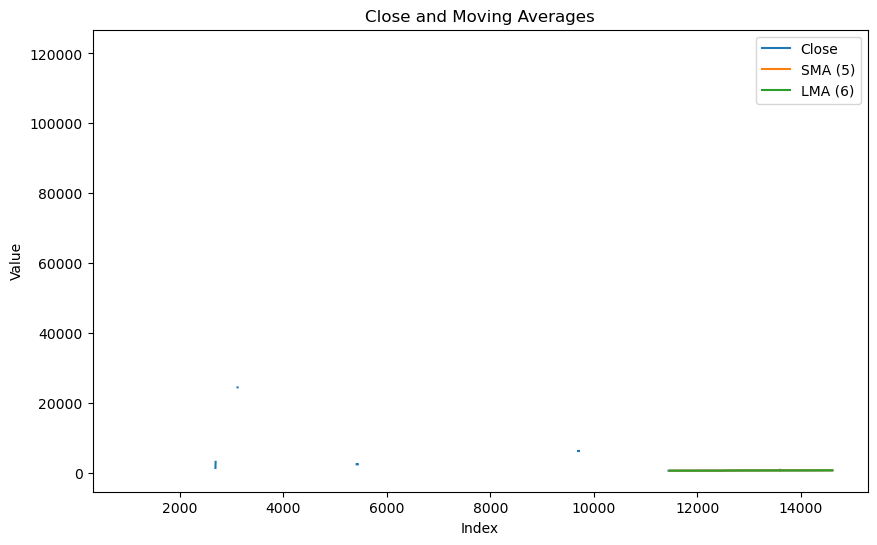

In [39]:
optimal_lma = 0
optimal_sma = 0
max_sma_lma_price_sum = float('-inf')

# Iterate over all possible combinations of LMA and SMA values
for lma in range(5, 26):
    for sma in range(5, 26):
        if sma < lma:  # Ensure SMA is less than LMA
            # Calculate SMA-LMAPrice
            colected_data['SMA'] = colected_data['Close'].rolling(sma).mean()
            colected_data['LMA'] = colected_data['Close'].rolling(lma).mean()
            colected_data['SMA-LMAPrice'] = (colected_data['Close'] / colected_data['Close'].shift(1) - 1).where(colected_data['SMA'] > colected_data['LMA']) * 100

            # Calculate the sum of SMA-LMAPrice
            sma_lma_price_sum = colected_data['SMA-LMAPrice'].sum()

            # Update optimal values if a better combination is found
            if sma_lma_price_sum > max_sma_lma_price_sum:
                optimal_lma = lma
                optimal_sma = sma
                max_sma_lma_price_sum = sma_lma_price_sum

# Print the optimal LMA, SMA, and the corresponding sum
print(f"Ideal LMA: {optimal_lma}")
print(f"Ideal SMA: {optimal_sma}")
print(f"Max SMA-LMAPrice Sum: {max_sma_lma_price_sum}")

plt.figure(figsize=(10, 6))
plt.plot(colected_data['Close'], label='Close')
plt.plot(colected_data['SMA'], label=f'SMA ({optimal_sma})')
plt.plot(colected_data['LMA'], label=f'LMA ({optimal_lma})')
plt.legend()
plt.title('Close and Moving Averages')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [40]:
value1 = 688.51
value2 = 2

percentage_difference = abs((value2 - value1) / ((value1 + value2) / 2)) * 100

print(f"The percentage difference between {value1} and {value2} is: {percentage_difference}%")


The percentage difference between 688.51 and 2 is: 198.84143604002838%


In [41]:
import pandas as pd

def find_optimal_lma_sma(df):
    optimal_lma = 0
    optimal_sma = 0
    max_sma_lma_price_sum = float('-inf')

    for lma in range(5, 26):
        for sma in range(5, lma - 4):
            df['SMA'] = df['Close'].rolling(sma).mean()
            df['LMA'] = df['Close'].rolling(lma).mean()
            df['SMA-LMAPrice'] = (df['Close'] / df['Close'].shift(1) - 1).where(df['SMA'] > df['LMA']) * 100

            sma_lma_price_sum = df['SMA-LMAPrice'].sum()

            if sma_lma_price_sum > max_sma_lma_price_sum:
                optimal_lma = lma
                optimal_sma = sma
                max_sma_lma_price_sum = sma_lma_price_sum

    return optimal_lma, optimal_sma, max_sma_lma_price_sum

# Example usage:
# Replace this with your actual DataFrame
df = pd.DataFrame({'Close': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

optimal_lma, optimal_sma, max_sma_lma_price_sum = find_optimal_lma_sma(df)

print(f"Ideal LMA: {optimal_lma}")
print(f"Ideal SMA: {optimal_sma}")
print(f"Max SMA-LMAPrice Sum: {max_sma_lma_price_sum}")


Ideal LMA: 10
Ideal SMA: 5
Max SMA-LMAPrice Sum: 11.111111111111116


In [42]:
import pandas as pd

def find_optimal_lma_sma(df):
    optimal_lma = 0
    optimal_sma = 0
    max_sma_lma_price_sum = float('-inf')

    for lma in range(5, 26):
        for sma in range(5, 26):
            if sma < lma:
                df['SMA'] = df['Close'].rolling(sma).mean()
                df['LMA'] = df['Close'].rolling(lma).mean()
                df['SMA-LMAPrice'] = (df['Close'] / df['Close'].shift(1) - 1).where(df['SMA'] > df['LMA']) * 100

                sma_lma_price_sum = df['SMA-LMAPrice'].sum()

                if sma_lma_price_sum > max_sma_lma_price_sum:
                    optimal_lma = lma
                    optimal_sma = sma
                    max_sma_lma_price_sum = sma_lma_price_sum

    return optimal_lma, optimal_sma, max_sma_lma_price_sum

# Example usage:
# Replace this with your actual DataFrame
df = pd.DataFrame({'Close': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

optimal_lma, optimal_sma, max_sma_lma_price_sum = find_optimal_lma_sma(df)

print(f"Ideal LMA: {optimal_lma}")
print(f"Ideal SMA: {optimal_sma}")
print(f"Max SMA-LMAPrice Sum: {max_sma_lma_price_sum}")


Ideal LMA: 6
Ideal SMA: 5
Max SMA-LMAPrice Sum: 74.56349206349206


In [43]:
import pandas as pd

def find_optimal_lma_sma(df, min_difference):
    optimal_lma = 0
    optimal_sma = 0
    max_sma_lma_price_sum = float('-inf')

    for lma in range(5, 26):
        for sma in range(5, lma - min_difference + 1):
            df['SMA'] = df['Close'].rolling(sma).mean()
            df['LMA'] = df['Close'].rolling(lma).mean()
            df['SMA-LMAPrice'] = (df['Close'] / df['Close'].shift(1) - 1).where(df['SMA'] > df['LMA']) * 100

            sma_lma_price_sum = df['SMA-LMAPrice'].sum()

            if sma_lma_price_sum > max_sma_lma_price_sum:
                optimal_lma = lma
                optimal_sma = sma
                max_sma_lma_price_sum = sma_lma_price_sum

    return optimal_lma, optimal_sma, max_sma_lma_price_sum

# Example usage:
# Replace this with your actual DataFrame
df = pd.DataFrame({'Close': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})
min_difference = 5  # Change this value as needed

optimal_lma, optimal_sma, max_sma_lma_price_sum = find_optimal_lma_sma(df, min_difference)

print(f"Ideal LMA: {optimal_lma}")
print(f"Ideal SMA: {optimal_sma}")
print(f"Max SMA-LMAPrice Sum: {max_sma_lma_price_sum}")


Ideal LMA: 10
Ideal SMA: 5
Max SMA-LMAPrice Sum: 11.111111111111116


In [44]:
colected_data['Date']

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
                ...         
14605    2024-02-14 18:12:21
14606    2024-02-14 18:12:57
14607    2024-02-14 18:13:33
14608    2024-02-14 18:14:08
14609    2024-02-14 18:14:44
Name: Date, Length: 14610, dtype: object

In [45]:
import pandas as pd
from datetime import datetime, timedelta

# Assuming colected_data is your DataFrame
# Convert 'Date' column to datetime format
colected_data['Date'] = pd.to_datetime(colected_data['Date'])

# Get today's and yesterday's dates
today = datetime.today().date()
yesterday = datetime.today().date() - timedelta(days=1)

# Filter the DataFrame to get data only for today and yesterday
today_data = colected_data[colected_data['Date'].dt.date == today]
yesterday_data = colected_data[colected_data['Date'].dt.date == yesterday]

# Calculate high, low, and average prices for today
today_high = today_data['High'].max()
today_low = today_data['Low'].min()
today_average = today_data['Close'].mean()

# Calculate high, low, and average prices for yesterday
yesterday_high = yesterday_data['High'].max()
yesterday_low = yesterday_data['Low'].min()
yesterday_average = yesterday_data['Close'].mean()

# Print the results
print("Today's High Price:", today_high)
print("Today's Low Price:", today_low)
print("Today's Average Price:", today_average)
print()
print("Yesterday's High Price:", yesterday_high)
print("Yesterday's Low Price:", yesterday_low)
print("Yesterday's Average Price:", yesterday_average)

Today's High Price: nan
Today's Low Price: nan
Today's Average Price: nan

Yesterday's High Price: nan
Yesterday's Low Price: nan
Yesterday's Average Price: nan


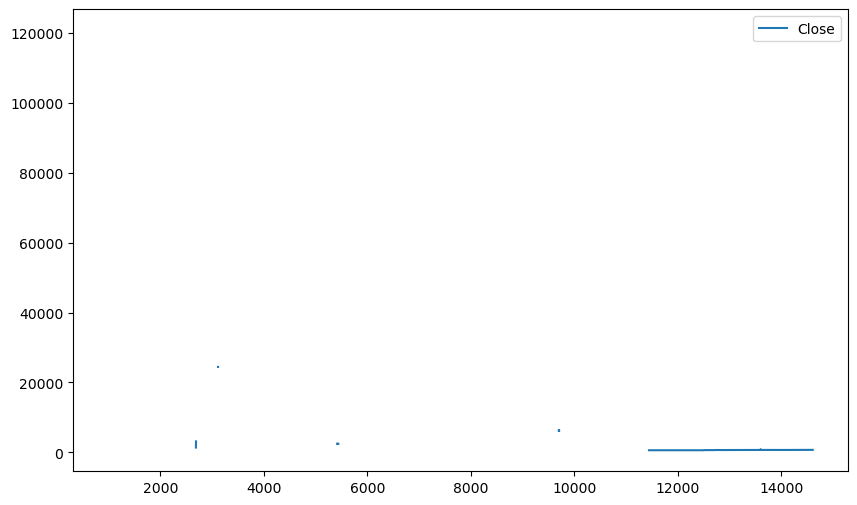

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(colected_data['Close'], label='Close')
plt.legend()
plt.show()

In [47]:
# Find intersections
sma_lma_intersection = df.index[np.where((df['SMA'].shift(1) < df['LMA'].shift(1)) & (df['SMA'] > df['LMA']))]
macd_sl_intersection = df.index[np.where((df['MACD'].shift(1) < df['SL'].shift(1)) & (df['MACD'] > df['SL']))]

# Plot the data
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Close'], label='Close Price', linewidth=2)

'''
CUM SA FACI GRAFICE
plt.figure(figsize=(16, 6))
plt.plot(df.index, df[COLOANA DIN DF'], label='COLOANA DIN DF', linewidth=2)
'''
plt.plot(df.index, df['LMA'], label='LMA (50 days)', linestyle='--')
plt.plot(df.index, df['SMA'], label='SMA (20 days)', linestyle='--')
plt.plot(df.index, df['MACD'], label='MACD', linestyle='-.')
plt.plot(df.index, df['SL'], label='Signal Line', linestyle='-.')

# Add vertical gridlines
for date in sma_lma_intersection:
    plt.axvline(x=date, color='gray', linestyle='--', alpha=0.5, linewidth=0.5)

for date in macd_sl_intersection:
    plt.axvline(x=date, color='orange', linestyle='--', alpha=0.5, linewidth=0.5)

plt.title('Technical Indicators for TSLA in 2023')
plt.xlabel('Date')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'MACD'